In [1]:
import pandas as pd
import os
import logging 
import matplotlib.pyplot as plt

In [2]:

# Set up logging
logging.basicConfig(
    filename="datasets.log",  # Log file name
    level=logging.INFO,       # Log level
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Define the directory containing your datasets
data = r"C:\Users\Hasan\Desktop\week4"

# File names
files = ["store.csv", "test.csv", "train.csv"]

# Read and log datasets
for file in files:
    try:
        file_path = os.path.join(data, file)
        df = pd.read_csv(file_path)  # Read the CSV file
        
        # Log the file name and its contents (first few rows)
        logging.info(f"Contents of {file}:\n{df.head().to_string(index=False)}")
        print(f"{file} processed and logged successfully.")
        # Print the file's head to the console
        print(f"\nContents of {file}:")
        print(df.head())
    except Exception as e:
        # Log any errors that occur during processing
        logging.error(f"Error processing {file}: {e}")
        print(f"Error processing {file}. Check log for details.")
         



store.csv processed and logged successfully.

Contents of store.csv:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     

C:\Users\Hasan\AppData\Local\Temp\ipykernel_8736\2789875488.py:18: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Read the CSV file


In [3]:
# Define the file path
data = r"C:\Users\Hasan\Desktop\week4"
store_file = os.path.join(data, "store.csv")

try:
    # Load the dataset
    store_df = pd.read_csv(store_file)

    # Check for missing values before filling
    print("Missing values before filling:")
    print(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

    # Fill missing values
    store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].mean())  # Fill with mean
    store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].mean())  # Fill with mean
    store_df['PromoInterval'] = store_df['PromoInterval'].fillna(store_df['PromoInterval'].mode()[0])  # Fill with mode

    # Check for missing values after filling
    print("\nMissing values after filling:")
    print(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

    # Save the cleaned dataset (optional)
    cleaned_file = os.path.join(data, "store_cleaned.csv")
    store_df.to_csv(cleaned_file, index=False)
    print(f"Cleaned data saved to {cleaned_file}")
except Exception as e:
    print(f"Error processing store.csv: {e}")


Missing values before filling:
Promo2SinceWeek    544
Promo2SinceYear    544
PromoInterval      544
dtype: int64

Missing values after filling:
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64
Cleaned data saved to C:\Users\Hasan\Desktop\week4\store_cleaned.csv


In [5]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [6]:
# Define dataset directory and file paths
data = r"C:\Users\Hasan\Desktop\week4"
store_file = os.path.join(data, "store.csv")
train_file = os.path.join(data, "train.csv")

# Load datasets
store = pd.read_csv(store_file)
train = pd.read_csv(train_file)

# Merge train and store datasets on 'Store'
df = pd.merge(train, store, on="Store", how="left")

# Preview the merged dataset
print(df.head())


C:\Users\Hasan\AppData\Local\Temp\ipykernel_8736\1619067844.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_file)


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [7]:
#. Preprocess the Data
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


In [8]:
# Fill missing CompetitionDistance with median
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

# Fill missing categorical columns with 'Unknown'
categorical_cols = ['StoreType', 'Assortment', 'PromoInterval']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')


In [12]:
# Define features and target
X = df.drop(columns=['Sales'])
y = df['Sales']


In [13]:
# Identify numeric and categorical columns
numeric_features = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 
                    'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 
                    'Year', 'Month', 'Day', 'Weekday']
categorical_features = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_types = set(type(val) for val in df[col].dropna())
        if len(unique_types) > 1:
            print(f"Column '{col}' has mixed types: {unique_types}")


In [23]:
df['StateHoliday'] = df['StateHoliday'].astype(str)


In [24]:
# Ensure 'StateHoliday' column is consistent
df['StateHoliday'] = df['StateHoliday'].astype(str)

# If other categorical columns also need type consistency, ensure they are strings:
categorical_features = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']
for col in categorical_features:
    df[col] = df[col].astype(str)


In [25]:
df['StateHoliday'] = df['StateHoliday'].replace({0: 'None'})
df['StateHoliday'] = df['StateHoliday'].astype(str)


In [27]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        unique_types = set(type(val) for val in X_train[col].dropna())
        if len(unique_types) > 1:
            print(f"Column '{col}' has mixed types: {unique_types}")


Column 'StateHoliday' has mixed types: {<class 'str'>, <class 'int'>}


In [28]:
# Convert problematic columns to string
problematic_columns = ['StateHoliday']  # Replace with your actual columns
for col in problematic_columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


In [29]:
X_train['StateHoliday'] = X_train['StateHoliday'].replace({0: 'None'})
X_test['StateHoliday'] = X_test['StateHoliday'].replace({0: 'None'})


In [30]:
categorical_features = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']

# Ensure all categorical columns are strings
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


In [31]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [46]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")



RMSE: 1150.9052446043115
R2: 0.9104333532858263


In [50]:
# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)




In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'StateHoliday' column
X_train['StateHoliday'] = label_encoder.fit_transform(X_train['StateHoliday'])


In [53]:
print(X_train.dtypes)


Store                               int64
DayOfWeek                           int64
Open                                int64
Promo                               int64
StateHoliday                        int64
SchoolHoliday                       int64
CompetitionDistance               float64
CompetitionOpenSinceMonth         float64
CompetitionOpenSinceYear          float64
Promo2                              int64
Promo2SinceWeek                   float64
Promo2SinceYear                   float64
Year                                int32
Month                               int32
Day                                 int32
Weekday                             int32
StoreType_b                          bool
StoreType_c                          bool
StoreType_d                          bool
Assortment_b                         bool
Assortment_c                         bool
PromoInterval_Jan,Apr,Jul,Oct        bool
PromoInterval_Mar,Jun,Sept,Dec       bool
PromoInterval_Unknown             

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train is your prepared training data and y_train is your target variable
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor()

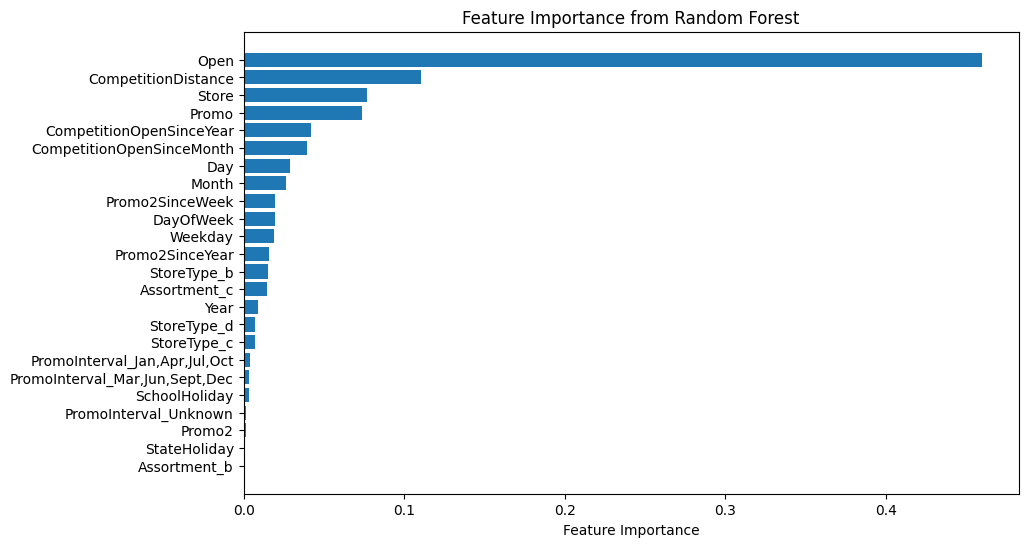

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns  # If X_train is a pandas DataFrame

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_distributions = {
    'n_estimators': [50, 100],          # Reduced range for speed
    'max_depth': [10, None],            # Limited depth
    'min_samples_split': [2, 5],        # Fewer values
    'min_samples_leaf': [1, 2],         # Limited leaf sizes
    'max_features': ['sqrt', 'log2']    # Avoid 'auto' (deprecated)
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_distributions, 
    n_iter=50,                          # Number of random combinations to try
    cv=3,                               # Cross-validation folds
    scoring='neg_mean_squared_error',    # Evaluation metric
    verbose=2, 
    random_state=42, 
    n_jobs=-1                            # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", -random_search.best_score_)  # Negated to show positive MSE

# Save the best model using joblib
from joblib import dump
dump(random_search.best_estimator_, 'optimized_random_forest_model.pkl')
print("Model saved as optimized_random_forest_model.pkl")


c:\Users\Hasan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits
